# **Decision Tree from Scratch**


In this course, you will learn everything you need to know about Decision Trees and how they work under the hood. Hope you'll find this helpful

# **Table Of Contents**

1. [Introduction to Decision Trees](#1)
2. [How does the Decision Tree Algorithm Work](#2)
3. [What is Information Gain and How do we measure it in Decision Tree](#3)
4. [Evaluating the Complexity of Decision Tree Algorithm](#4)
5. [Pros and Cons of Decision Trees](#5)
6. [Decision Trees in Scikit-learn](#6)

# **1. Introduction to Decision Trees** <a class="anchor" id="1"></a>

So what are **Decision Trees**?

**Decision Trees** are non-parametric (model complexity can grow with the amount of data allowing it to capture more complex patterns) supervised learning algorithm, 
which can be use for both Classification and Regression tasks. It has a hierachical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.



## 1.1 Decision Trees component

- **Root Node** : Very first node of the tree it represents the entire dataset and the initial decision made by the algorithm.

- **Branches** : Represent the result of a node decision. For example at a node level we can have x1 > 5 the result of this can be either True or False, so we will have two branches, one for the case the result is True and the other for the case the result is False.

- **Internal Nodes** : Represent decision points where the data is split based on feature's value. These nodes apply conditions to the features in the dataset and direct the data down to leaf nodes.

- **Leaf Nodes** : Represent the final prediction, no further splits happen at this nodes.

<img src="DecisionTree.png" style="display: block; margin-left: auto; margin-right: auto;"></img>

You cannot convert every set of rules to decision trees, but you can convert every decision trees to a set of rules. That is why decision trees are good models for **Machine Learning Explainability**.

# **2. How does the Decision Tree Algorithm Work** <a class="anchor" id="2"></a>

Decision Tree Algorithm follow a step by step process that helps classify data points or predict value by splitting the dataset recursively into smaller more manageable parts. Here is an overview of how it works: 


- **Starting with the whole Dataset** : The algorithm begins by considering the entire dataset as one big group. It looks for the best way to split this data into smaller groups based on one of the features(variables) in the dataset.


Now a question you may ask is how does it choose which of the features is the best for splitting the dataset??


- **Choosing the best feature to split**: The algorithm examines all the features and chooses the one that splits the data the best. It uses a measure called **Information Gain** to decide this. I will talk about Information Gain in the next section, for now just understand it like this. Information Gain helps the algorithm find the feature that creates the most **"purity"** in the data after the split. **Purity** means that after splitting, most of the data points in each group belong to a single class (for classification tasks) or have similar values (for regression tasks).


- **Recursively Splitting the Data**: Once the first split is made, the algorithm repeats the process for each of the resulting groups. It keeps splitting the data recursively, creating smaller and smaller groups, and building branches of the tree along the way. At each step, it looks for the feature that gives the highest Information Gain.


At this point you understand the general approach of Decision Trees and you understand it is a recursive algorithm, but we missed something, every recursive algorithm need a stopping criteria, and Decision Trees are no exceptions.


- **Stopping Conditions**: The algorithm continues splitting until it reaches one of the stopping points: 

    - **Pure Nodes**: If a node is "pure"(all data points belong to the same class or have very similar values), there's no need to split it further.

    - **Information Gain is too small**: If the information Gain from a potential split is too low(indicating the split won't improve the tree), the algorithm stops splitting that branch.

    - **Maximum depth or other constraints**: A maximum depth can be specified for the tree to prevent overfitting but more on that later.
    


- **Making Predictions** : Now that our Decision Tree is fully grown, it can used to make predictions. To classify a new data point, the decision tree starts at the root node and follows the splits based on the data point's feature values until it reaches a leaf node. The class or value at that leaf node is the prediction.


# **3. What is Information Gain and How do we measure it in Decision Tree**  <a class="anchor" id="3"></a>

In the previous section we explain that the Decision Tree algorithm recursively split the data based on the best features and that it uses something call **Information Gain** to determine which feature is the best. But we didn't explain what is Information Gain and how do we measure it in Decision Tree. So let's do it now!

**Information Gain** : is a metric used in decision trees to determine how well a feature separates the data into distinct classes. It measures the reduction in uncertainty or entropy when the dataset is split based on a specific feature. The higher the information Gain, the more effective the feature is at classifying the data.

So now we understand what Information Gain is, but we still don't know how to measure it in Decision Tree. If we take a closer look at the definition we can read **"It measeures the reduction in uncertainty or entropy"**. So entropy can be used to calculate Information Gain, here is the formula: 




$\text{GAIN}(\mathcal{D}, x_j) = H(\mathcal{D}) - \sum_{v \in \text{Values}(x_j)} \frac{|\mathcal{D}_v|}{|\mathcal{D}|} H(\mathcal{D}_v)$

<img src="InformationGain.png" style="display: block; margin-left: auto; margin-right: auto;"></img>

Let's play around with the formula to make sure we understand everything: 

Example: Let's compute the Entropy and Gain Information for the following Decision Tree.

<img src="Entropy.png" style="display: block; margin-left: auto; margin-right: auto;"></img>



The Entropy's formula is : $H(S) = -\sum_{i=1}^{c} p_i \log_2(p_i)$


At the root node we have: 

$$

y = 1: 60, \quad y = 0: 40 \\
\text{Total examples} = 60 + 40 = 100 \\[10pt]

p_1 = \frac{60}{100} = 0.6 \\[10pt]
p_0 = \frac{40}{100} = 0.4 \\[10pt]

\log_2(p_1) = \log_2(0.6) \approx -0.737 \\[10pt]
\log_2(p_0) = \log_2(0.4) \approx -1.322 \\[10pt]

H(S) = -(p_1 \log_2(p_1) + p_0 \log_2(p_0)) \\[10pt]

H(S) = -(0.6 \times (-0.737) + 0.4 \times (-1.322)) \\[10pt]

H(S) = -( -0.4422 + -0.5288 ) \\[10pt]

H(S) = 0.971
$$


We repeat this exact process for all the nodes in our Tree, to have the result you see on the image.

Now let's compute the Information Gain at the root node to see if it was a good decision to split at that node: 

$\text{GAIN}(\mathcal{D}, x_j) = H(\mathcal{D}) - \sum_{v \in \text{Values}(x_j)} \frac{|\mathcal{D}_v|}{|\mathcal{D}|} H(\mathcal{D}_v)$

$$
\text{Gain}(D, x_i) = H(D) - \sum_{v \in V_i} \frac{|D_v|}{|D|} H(D_v) \\[10pt]

= 0.971 - \frac{D_1}{D}H(D_1) - \frac{D_0}{D}H(D_0) \\[10pt]

= 0.971 - \frac{50}{100} \times 0.971 - \frac{50}{100} \times 0.6438 \\[10pt]

= 0.971 - \frac{50}{100}(0.971 + 0.6438) \\[10pt]

= 0.971 - \frac{1}{2}(0.971 + 0.6438) \\[10pt]

= 0.971 - 0.5(0.971 + 0.6438) \\[10pt]

\text{Gain}(D, x_i) = 0.1636 > 0 \quad \text{So it was a good decision}

$$

- D1 is the dataset consisting of values where x1 = 1. We have 50 of these points. <br>

- D0 is the dataset consisting of values where x1 = 0 (if we suppose we have only two categories). We have 50 of these points.

The Decision tree algorithm will repeat this operation for each feature in the dataset and then choose the feature with the highest Information Gain and choose it as the splitting criterion for the root node.

In the formula for the Information Gain i mentionned that H(D) is the entropy, but it can also be **The Gini Entropy**, or the **Misclassification error**:

<div style="display: flex; justify-content: center;">
    <div style="margin-right: 20px;">
        <img src="Gini.png" alt="Gini" style="max-width: 100%;">
    </div>
    <div>
        <img src="Misclassification.png" alt="Misclassification" style="max-width: 100%;">
    </div>
</div>

<div style="text-align: center; margin-top: 20px;">
    <p>Credit to <a href="https://www.linkedin.com/in/sebastianraschka/" target="_blank">Sebastian Raschka</a></p>
</div>



Entropy and Gini Impurity are often more used to compute the Information Gain, because Misclassification Error simply looks at the fraction of misclassified instances. It doesn't account for how evenly split the classes are, and can fail to provide the detailed information necessary for effective splitting early in the three.

# **4. Evaluating the Complexity of Decision Tree Algorithm** <a class="anchor" id="4"></a>

Hopefully at this point, you understand how a Decision Tree algorithm work under the hood. Now the only thing left, is to evaluate the **Algorithm Complexity** let's do that!

In order to evaluate the complexity of the Decision Tree algorithm, we need to understand the computation happening at each step: 

- At each node of the decision tree and for every features, we need to find the best splitting criterion. For example, let say we have a feature x1 is it best to take the condition (x1 >1 or x1 = 1) 

- The best split is the one that maximizes a criterion like **Information Gain**

- In order to find the best split, a naive approach will be to test every possible value as a split point, but that would be inefficient. A better way of doing it, will be to first sort the feature values, and then consider only the split point between adjacent values. This will reduces the number of split we need to evaluate to n-1 where n is the number of training examples.

- Sorting the feature values for each feature is similar to sorting an array, so the time complexity for that is **O(nlogn)**

- Now we repeat this process for each feature in the dataset so the total complexity for a node is **O(d * nlogn)** if we have d features.

- But that is just for a node, we will repeat this process for each node. So in order to find the final total complexity we will need to multiply the previous result by the number of node in the tree.

- In the worst case scenario a Decision Tree can grow until it has as many leaf nodes as there are training examples(one leaf per sample), that will be n leaf nodes. The total number of nodes is proportional to the number of leaf nodes so proportional to n. In a Binary Decision Tree it is  approximately 2n - 1. In term of complexity both are equivalent to n.

- So the final complexity will be **O($n^2$⋅dlogn)**

# **5. Pros and Cons of Decision Trees** <a class="anchor" id="5"></a>

## Pros

- Any Decision Tree can be converted to a set of rules, that makes them **easy to interpret and communicate**

- Missing values do not affect the process of building a decision tree

- Decision tree does not require normalization of data.

- Decision tree does not require scaling of data.

## Cons

- Easy to overfit

- In regression trees, output range is bounded(depends on the training data), it cannot extrapolate outside of the training data. This is due to the fact that Decision trees predictions are piecewise

- Decision tree are unstable, a small variation in the data can result in a completely different tree generated.

- If there is high class imbalance, decision tree create biased trees. It is therefore recommended to balance the dataset prior to fitting with the decision tree.



# **6. Decision Trees in Scikit-learn**

Now that we understand the theory of Decision Trees let's work with it in pratice using Scikit learn.

## 6.1 Classification with Decision Trees

Let's see how we can do Classification with Decision Trees using scikit learn

### Imports

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import plotly.graph_objects as go
from matplotlib.animation import FuncAnimation


### Loading the Data

In [2]:
breast_cancer = load_breast_cancer()

df = pd.DataFrame(data = breast_cancer.data, columns = breast_cancer.feature_names)
df['target'] = breast_cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Missing values, duplicates

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.isnull().sum().sum(), df.duplicated().sum()

(0, 0)

The dataset is clean...

### Training

In [5]:
y = df['target']
X = df.drop('target', axis = 1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state=42)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

Now it's time to build the model but before that, let's explore what are the parameters of Decision Tree in scikit-learn. Here's a quick summary: 


| **Parameter**               | **Description**                                                                                                                                                        | **Values**                               | **Default**   |
|-----------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------|---------------|
| `criterion`                 | Function to measure the quality of a split (Gini impurity or Shannon information gain).                                                                                 | {"gini", "entropy", "log_loss"}          | "gini"        |
| `splitter`                  | Strategy used to choose the split at each node.                                                                                                                         | {"best", "random"}                       | "best"        |
| `max_depth`                 | Maximum depth of the tree. Nodes are expanded until leaves are pure or contain fewer than `min_samples_split` samples if `None`.                                         | int                                      | None          |
| `min_samples_split`         | Minimum number of samples required to split an internal node. Can be an integer or a fraction of samples.                                                               | int or float                             | 2             |
| `min_samples_leaf`          | Minimum number of samples required to be at a leaf node.                                                                                                                | int or float                             | 1             |
| `min_weight_fraction_leaf`  | Minimum weighted fraction of the sum of sample weights required to be at a leaf node.                                                                                   | float                                    | 0.0           |
| `max_features`              | Number of features to consider when looking for the best split.                                                                                                         | int, float, {"auto", "sqrt", "log2"}     | None          |
| `random_state`              | Controls the randomness of the estimator, especially the splits when they result in identical values.                                                                   | int, RandomState instance, or None       | None          |
| `max_leaf_nodes`            | Grow a tree with the best-first approach, up to a maximum number of leaf nodes.                                                                                         | int                                      | None          |
| `min_impurity_decrease`     | A node will be split if the impurity decrease caused by the split exceeds this value.                                                                                   | float                                    | 0.0           |
| `class_weight`              | Weights associated with each class, allowing imbalanced class handling.                                                                                                | dict, list of dict, or "balanced"        | None          |
| `ccp_alpha`                 | Complexity parameter for Minimal Cost-Complexity Pruning. Subtrees with a cost less than `ccp_alpha` will be pruned.                                                    | non-negative float                       | 0.0           |


You can also use the **help()** function to get the parameters and their default values.

In [8]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to 

Now let's train our Decision Tree and see how a parameter like max_depth influence the train and test scores.

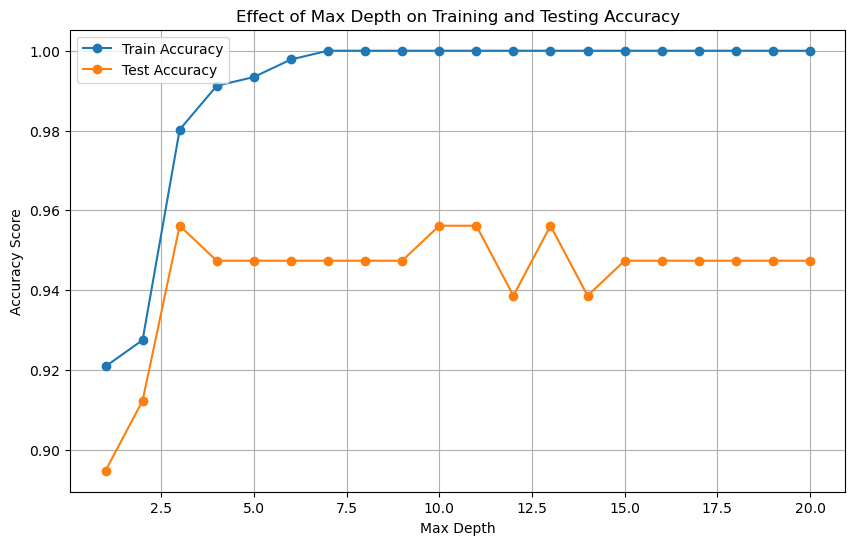

In [9]:
# Range of max_depth values to try
max_depths = range(1, 21)

# Lists to store the scores
train_scores = []
test_scores = []

# Loop through the different max_depth values
for max_depth in max_depths:
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    tree.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)
    
    # Accuracy scores
    train_score = accuracy_score(y_train, y_train_pred)
    test_score = accuracy_score(y_test, y_test_pred)
    
    # Append scores to lists
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, label='Train Accuracy', marker='o')
plt.plot(max_depths, test_scores, label='Test Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.title('Effect of Max Depth on Training and Testing Accuracy')
plt.legend()
plt.grid(True)
plt.show()

When we look at the graph, we can see that the accuracy on the training data reaches 100% as the max_depth increases, which suggests that the model is memorizing the training data. This is a classic sign of **overfitting**. The accuracy on the test data plateaus and slightly fluctuates after max_depth = 3, staying consistently lower than the training accuracy. This further indicates overfitting. The model is performing very well on the training data but is not generalizing as well on unseen test data.

We can also use the graph to find the ideal value for the **max_depth** parameter. When we look at the graph, we can see that around max_depth = 3 or max_depth = 4, the testing accuracy peaks, while the training accuracy is still high but not fully 100%. This suggests that this is the ideal complexity for the model, balancing between underfitting and overfitting.

### Decision Boundary

In [10]:
tree

DecisionTreeClassifier(criterion='entropy', max_depth=20)

In [14]:
# Select only two features for visualization using iloc
X_train = X_train.iloc[:, [0, 1]]  # Selecting the first two features

# Create a mesh grid
x_min, x_max = X_train.iloc[:, 0].min() - 0.5, X_train.iloc[:, 0].max() + 0.5
y_min, y_max = X_train.iloc[:, 1].min() - 0.5, X_train.iloc[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Function to plot decision boundary
def plot_decision_boundary(ax, clf):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, s=20, edgecolor='black')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

# Set up the figure and animation
fig, ax = plt.subplots(figsize=(10, 8))
max_depth_values = range(1, 11)

def animate(i):
    ax.clear()
    clf = DecisionTreeClassifier(max_depth=max_depth_values[i], random_state=42)
    clf.fit(X_train, y_train)
    plot_decision_boundary(ax, clf)
    ax.set_title(f'Decision Tree Boundary (Max Depth: {max_depth_values[i]})')

# Create the animation
anim = FuncAnimation(fig, animate, frames=len(max_depth_values), repeat=True, interval=1000)

# Save the animation (optional)
anim.save('decision_tree_animation.gif', writer='pillow', fps=1)

plt.close(fig)  # Close the figure to prevent display in the notebook

# To display the animation in the notebook, use the following:
from IPython.display import HTML
HTML(anim.to_jshtml())



/home/maxtheking/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/maxtheking/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/maxtheking/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/maxtheking/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/maxtheking/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.w